<a href="https://colab.research.google.com/github/Faiz-Hibatullah/machine-learning-1103210172/blob/main/1.%20Week%201/calssification_heartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

#Dataset

In [73]:
# Mengunduh dataset dari GitHub
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/01.%20Week%201/Dataset/HeartDisease.csv"
df = pd.read_csv(url)

# Melihat informasi dataset
print("Informasi Dataset:")
print(df.info())
print("\nLima baris pertama:")
print(df.head())
print("\nStatistik deskriptif:")
print(df.describe())

# Cek nilai yang hilang
print("\nJumlah nilai yang hilang per kolom:")
missing_values = df.isnull().sum()
print(missing_values)
print(f"\nTotal nilai yang hilang: {missing_values.sum()}")

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB
None

Lima baris pertama:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1 

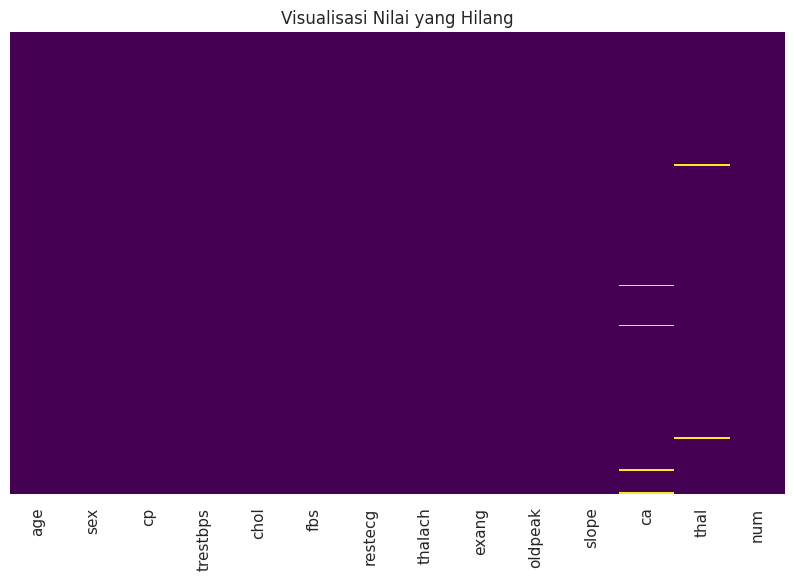


Kolom target adalah: num


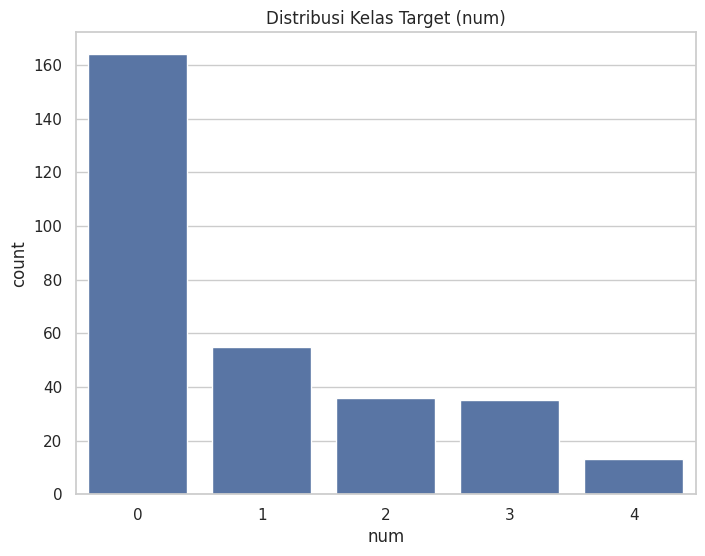

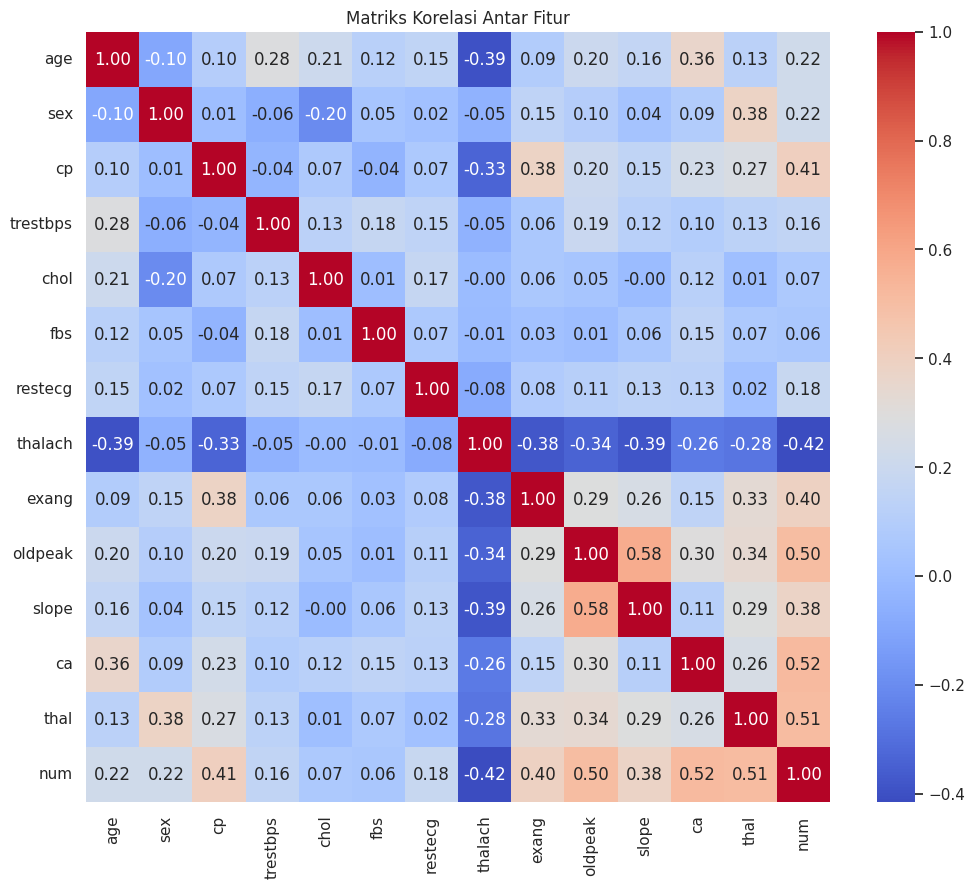

In [74]:
# Visualisasi nilai yang hilang
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Visualisasi Nilai yang Hilang')
plt.show()

# Ambil nama kolom target yang benar (kemungkinan 'target' atau nama lain)
# Kita asumsikan kolom terakhir adalah target
target_column = df.columns[-1]
print(f"\nKolom target adalah: {target_column}")

# Visualisasi distribusi target
plt.figure(figsize=(8, 6))
sns.countplot(x=target_column, data=df)
plt.title(f'Distribusi Kelas Target ({target_column})')
plt.show()

# Visualisasi korelasi antar fitur
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi Antar Fitur')
plt.show()

#Praproses Data

In [77]:
# Pisahkan fitur dan target
X = df.drop(target_column, axis=1)
y = df[target_column]

# Penanganan nilai yang hilang dengan imputation
# Kita akan menggunakan median untuk kolom numerik
print("\nMengatasi nilai yang hilang dengan imputasi median...")
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Verifikasi bahwa tidak ada lagi nilai yang hilang
print("\nJumlah nilai yang hilang setelah imputasi:")
print(X_imputed.isnull().sum().sum())

# One-hot encoding untuk variabel kategorikal
# Cek tipe data kolom untuk menentukan mana yang kategorikal
print("\nTipe data untuk setiap kolom:")
print(X_imputed.dtypes)


# Lakukan one-hot encoding hanya untuk kolom kategorikal (object atau category)
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
if not categorical_cols.empty:
    X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
else:
    print("\nTidak ada kolom kategorikal yang perlu di-encode")

# Pembagian data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Normalisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Mengatasi nilai yang hilang dengan imputasi median...

Jumlah nilai yang hilang setelah imputasi:
0

Tipe data untuk setiap kolom:
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
dtype: object

Tidak ada kolom kategorikal yang perlu di-encode


#Membuat Model

In [89]:
# Membangun model regresi logistik
print("\nMembangun model regresi logistik...")
model = LogisticRegression(C=1.0, max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# Prediksi pada data testing
y_pred = model.predict(X_test_scaled)
y_pred_prob = model.predict_proba(X_test_scaled)


Membangun model regresi logistik...


#Evaluasi Model

In [102]:
# 1. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# 2. Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAkurasi: {accuracy:.4f}")

# 3. Presisi
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Presisi: {precision:.4f}")

# 4. Recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.4f}")

# 5. F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score: {f1:.4f}")

# 6. AUC Score
auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
print(f"AUC: {auc:.4f}")

# 7. Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 8. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1], pos_label=2)

Confusion Matrix:
[[26  1  2  0  0]
 [ 3  3  3  3  0]
 [ 2  1  2  4  0]
 [ 1  2  2  2  0]
 [ 0  1  0  3  0]]

Akurasi: 0.5410
Presisi: 0.5120
Recall: 0.5410
F1-Score: 0.5212
AUC: 0.7718

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.38      0.25      0.30        12
           2       0.22      0.22      0.22         9
           3       0.17      0.29      0.21         7
           4       0.00      0.00      0.00         4

    accuracy                           0.54        61
   macro avg       0.32      0.33      0.32        61
weighted avg       0.51      0.54      0.52        61



#Visualisasi

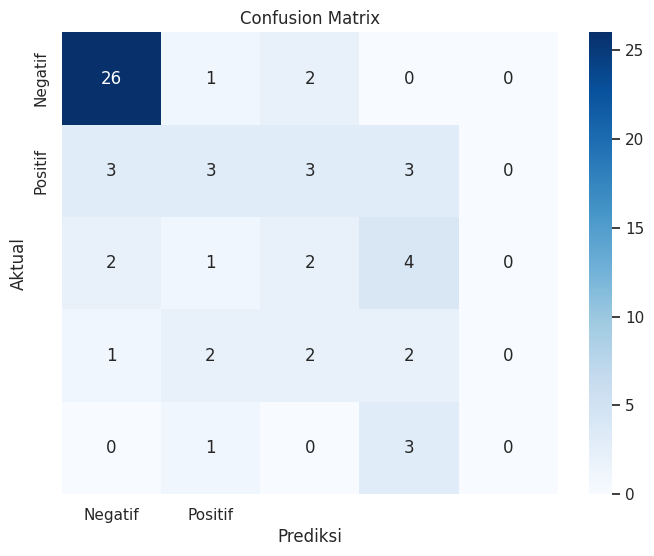

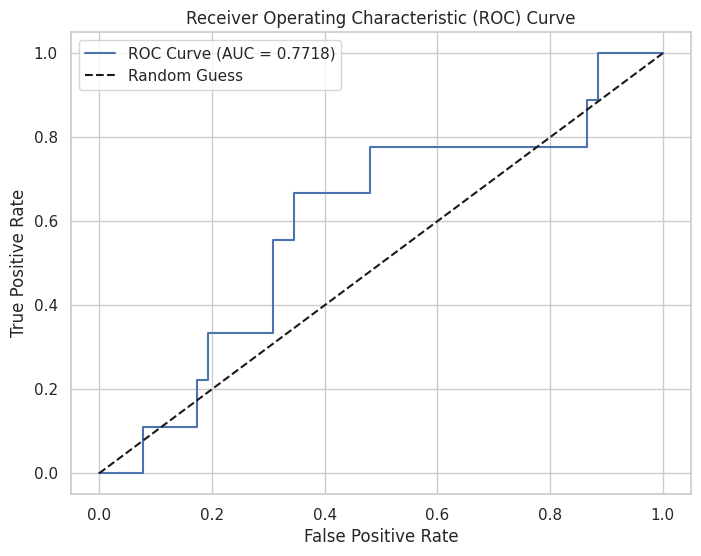

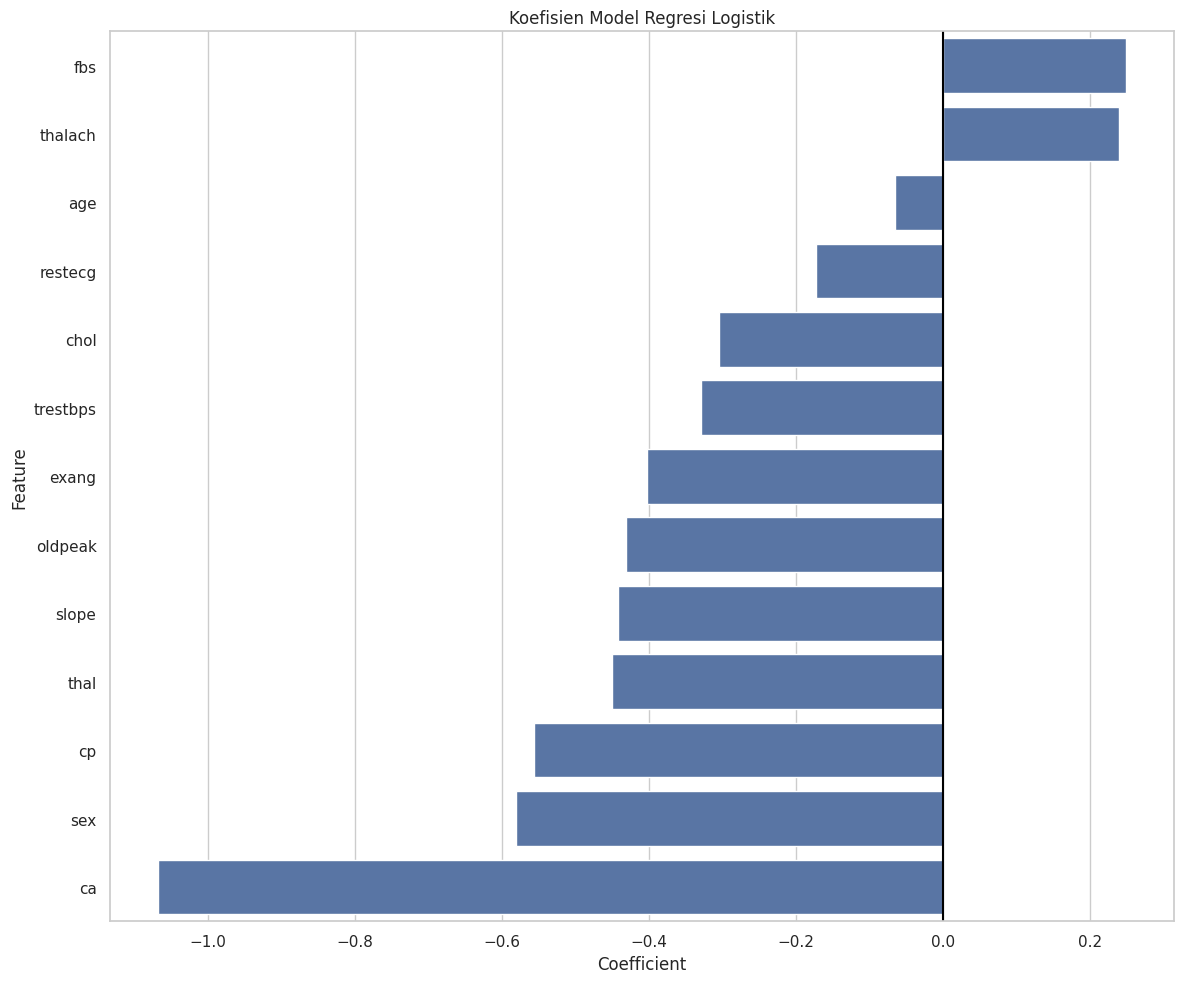

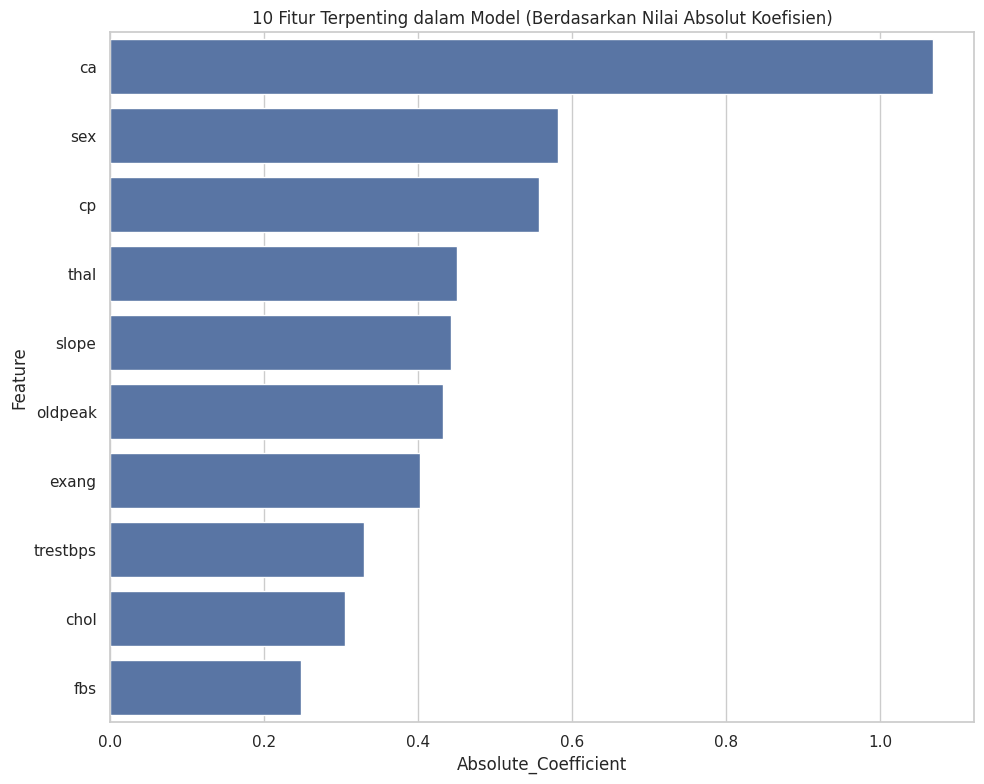


=== Contoh Prediksi ===
Data sampel:
age          53.0
sex           1.0
cp            3.0
trestbps    130.0
chol        246.0
fbs           1.0
restecg       2.0
thalach     173.0
exang         0.0
oldpeak       0.0
slope         1.0
ca            3.0
thal          3.0
Name: 179, dtype: float64

Prediksi: Negatif
Probabilitas positif: 0.0921


In [105]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negatif', 'Positif'],
            yticklabels=['Negatif', 'Positif'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

# Visualisasi koefisien model
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_[0]
})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(12, 10))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Koefisien Model Regresi Logistik')
plt.axvline(x=0, color='black', linestyle='-')
plt.tight_layout()
plt.show()

# Visualisasi feature importance (nilai absolut dari koefisien)
coefficients['Absolute_Coefficient'] = abs(coefficients['Coefficient'])
coefficients_top10 = coefficients.sort_values(by='Absolute_Coefficient', ascending=False).head(10)

plt.figure(figsize=(10, 8))
sns.barplot(x='Absolute_Coefficient', y='Feature', data=coefficients_top10)
plt.title('10 Fitur Terpenting dalam Model (Berdasarkan Nilai Absolut Koefisien)')
plt.tight_layout()
plt.show()

# Contoh prediksi untuk data baru
print("\n=== Contoh Prediksi ===")
# Ambil sampel dari data testing
sample = X_test.iloc[0]
sample_scaled = scaler.transform([sample])
prediction = model.predict(sample_scaled)[0]
prediction_prob = model.predict_proba(sample_scaled)[0, 1]

print("Data sampel:")
print(sample)
print(f"\nPrediksi: {'Positif' if prediction == 1 else 'Negatif'}")
print(f"Probabilitas positif: {prediction_prob:.4f}")

# Penjelasan Matematis
---
## 1. **Logistic Regression Model**
####  Klasifikasi Biner : Untuk mengubah output linear (𝑧 = 𝐰ᵗ𝐱 + 𝑏) menjadi probabilitas antara 0 - 1.
$$
P(y=1|\mathbf{x}) = \sigma(\mathbf{w}^T\mathbf{x} + b) = \frac{1}{1 + e^{-(\mathbf{w}^T\mathbf{x} + b)}}
$$

####  Klasifikasi Multi-Kelas (Softmax) : Memetakan skor logaritmik ke distribusi probabilitas untuk multiple class.  
$$
P(y=k|\mathbf{x}) = \frac{e^{\mathbf{w}_k^T\mathbf{x} + b_k}}{\sum_{j=1}^K e^{\mathbf{w}_j^T\mathbf{x} + b_j}}
$$

**Keterangan:**
- $\mathbf{w}, b$: Parameter model
- $K$: Jumlah kelas
- $\sigma()$: Fungsi sigmoid



## 2. **Fungsi Loss**
#### Cross-Entropy Loss : Mengukur "kesalahan" prediksi dengan membandingkan probabilitas prediksi (𝑝) dan label sebenarnya (𝑦).
$$
\mathcal{L}(\mathbf{W}) = -\frac{1}{N} \sum_{i=1}^N \sum_{k=1}^K y_{i,k} \log(p_{i,k})
$$

**Dimana:**
- $p_{i,k} = P(y=k|\mathbf{x}_i)$
- $y_{i,k} = \mathbb{I}[\text{label benar} = k]$



## 3. **Metrik Evaluasi**
#### Confusion Matrix : Memvisualisasikan kinerja model dalam 4 kategori prediksi.
$$
\begin{bmatrix}
\text{TN} & \text{FP} \\
\text{FN} & \text{TP}
\end{bmatrix}
$$

#### Presisi & Recall : Mengukur proporsi kasus positif yang benar dan berhasil terdeteksi

$$
\text{Presisi} = \frac{\text{TP}}{\text{TP} + \text{FP}}, \quad
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

#### F1-Score : Rata-rata harmonik antara Presisi dan Recall
$$
F_1 = \frac{2 \times \text{Presisi} \times \text{Recall}}{\text{Presisi} + \text{Recall}}
$$

#### AUC-ROC (One-vs-Rest)
$$
\text{AUC}_k = \int_{0}^{1} \underbrace{TPR_k}_{\text{Sensitivity}} d\underbrace{FPR_k}_{\text{1-Specificity}}
$$



## 4. **Kurva ROC**
**Definisi Axis:**
$$
\text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}}, \quad
\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}
$$

